In [ ]:
!pip install pandas
!curl -sL https://deb.nodesource.com/setup_18.x | sudo -E bash -
!sudo apt-get install -y nodejs

2024-08-29 14:08:09 - Installing pre-requisites
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 https://deb.nodesource.com/node_18.x nodistro InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,498 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:14 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 2,755 kB 

In [116]:
data = 'data_tweet_megathrust.csv'
search_keyword = 'megathrust lang:id until:2024-08-29 since:2024-01-01'
limit=1000

!npx --yes tweet-harvest@2.*.* -o "{data}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token ""

⠙⠹⠸⠼⠴⠦⠧⠇⠏Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.

? What's your Twitter auth token? › 78? What's your Twitter auth token? › *78? What's your Twitter auth token? › **78? What's your Twitter auth token? › ***78? What's your Twitter auth token? › ****78? What's your Twitter auth token? › *****78? What's your Twitter auth token? › ******78? What's your Twitter auth token? › *******78? What's your Twitter auth token? › ********78? What's your Twitter auth token? › *********78? What's your Twitter auth token? › **********78? What's your Twitter auth token? › ***********78? What's your Twitter auth token? › ************78? What's your Twitter auth token? › ****

In [117]:
import string
import nltk
import pandas as pd

In [118]:
data = pd.read_csv('data_tweet_megathrust.csv')
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1828945645903983100,Wed Aug 28 23:59:56 +0000 2024,0,Ng utek e mung tentang kedonyan pdhl persiapan...,1828945645903983100,NaN,NaN,in,NaN,0,1,0,https://x.com/thaniaaks/status/182894564590398...,3222100710,thaniaaks
1,1828944726168572305,Wed Aug 28 23:56:17 +0000 2024,0,Rawan bencana gempa Megathrust BPBD Mentawai s...,1828944726168572305,NaN,NaN,in,Jakarta Capital Region,0,0,0,https://x.com/KasanBaret/status/18289447261685...,892015585231380480,KasanBaret
2,1828944669977518333,Wed Aug 28 23:56:04 +0000 2024,0,BMKG ingatkan adanya potensi gempa Megathrust ...,1828944669977518333,NaN,NaN,in,Jakarta Capital Region,0,0,0,https://x.com/KasanBaret/status/18289446699775...,892015585231380480,KasanBaret
3,1828746351456420204,Wed Aug 28 23:44:05 +0000 2024,0,@ngapawoi Dan ketika gempa megathrust terjadi....,1828941656521048511,NaN,ngapawoi,in,Jakarta,0,0,0,https://x.com/rizqydar/status/1828941656521048511,160131706,rizqydar
4,1828937880368267621,Wed Aug 28 23:29:05 +0000 2024,0,Ciptaan Tuhan yg dilarang manusia #LoL #AK64 #...,1828937880368267621,https://pbs.twimg.com/ext_tw_video_thumb/18289...,NaN,in,NaN,0,0,0,https://x.com/maintarik/status/182893788036826...,1808523727455518720,maintarik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1828061572713050380,Mon Aug 26 13:26:57 +0000 2024,2,p @pemerintah kalo kata gw mending cepetan bua...,1828061572713050380,NaN,NaN,in,NaN,0,0,1,https://x.com/Tuannmuda666/status/182806157271...,1190409197524930560,Tuannmuda666
544,1828061543671771435,Mon Aug 26 13:26:50 +0000 2024,0,YaAllah stay safe everyone jadi kepikiran yg g...,1828061543671771435,NaN,NaN,in,NaN,0,0,0,https://x.com/Dinayyss/status/1828061543671771435,242491098,Dinayyss
545,1828061536876953880,Mon Aug 26 13:26:48 +0000 2024,0,Waduh abis disuruh nyicip megathrust,1828061536876953880,NaN,NaN,in,Paladin Strait,0,0,0,https://x.com/chefhandal/status/18280615368769...,1693940028505010176,chefhandal
546,1828060255483207982,Mon Aug 26 13:26:41 +0000 2024,0,@arshalaaca tar gw kirimin megathrust ke rumah...,1828061505918792026,NaN,arshalaaca,in,"Marshall Co., Lembang Group",0,0,0,https://x.com/gitiyuta/status/1828061505918792026,1271612979918721024,gitiyuta


In [119]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['Year'] = data['created_at'].dt.year
data['Month'] = data['created_at'].dt.month
data['Day'] = data['created_at'].dt.day

In [120]:
df = data[['full_text','Year','Month','Day']]

In [121]:
df

,full_text,Year,Month,Day
0,Ng utek e mung tentang kedonyan pdhl persiapan...,2024,8,28
1,Rawan bencana gempa Megathrust BPBD Mentawai s...,2024,8,28
2,BMKG ingatkan adanya potensi gempa Megathrust ...,2024,8,28
3,@ngapawoi Dan ketika gempa megathrust terjadi....,2024,8,28
4,Ciptaan Tuhan yg dilarang manusia #LoL #AK64 #...,2024,8,28
...,...,...,...,...
543,p @pemerintah kalo kata gw mending cepetan bua...,2024,8,26
544,YaAllah stay safe everyone jadi kepikiran yg g...,2024,8,26
545,Waduh abis disuruh nyicip megathrust,2024,8,26
546,@arshalaaca tar gw kirimin megathrust ke rumah...,2024,8,26


In [122]:
df.isna().sum()

,0
full_text,0
Year,0
Month,0
Day,0


In [123]:
df['full_text'][0]

'Ng utek e mung tentang kedonyan pdhl persiapan megathrust sing digowo mung klambi. Toh jokowi bien tukang kayu saiki yo dadi presiden. Poinnya nyapo kok aku blas raenek insecure2 e ng kwe mergo sesimple ndilat idu dewe e gak tak lakoni. Itulah kelas '

In [124]:
import re
for i in range(len(df['full_text'])):
  df['full_text'][i] = re.sub(r'https\S+', '', df['full_text'][i])
  df['full_text'][i] = re.sub(r'@\S+', '', df['full_text'][i])
  df['full_text'][i] = re.sub(r'#\S+', '', df['full_text'][i])
  df['full_text'][i] = re.sub(r"\'\w+", '', df['full_text'][i])
  df['full_text'][i] = re.sub(r"[^\w\s]", '', df['full_text'][i])
  df['full_text'][i] = re.sub(r"\s(2)", '', df['full_text'][i])

In [125]:
df['full_text'] = df['full_text'].str.lower()

In [126]:
df['full_text']

,full_text
0,ng utek e mung tentang kedonyan pdhl persiapan...
1,rawan bencana gempa megathrust bpbd mentawai s...
2,bmkg ingatkan adanya potensi gempa megathrust ...
3,dan ketika gempa megathrust terjadi smua tekn...
4,ciptaan tuhan yg dilarang manusia
...,...
543,p kalo kata gw mending cepetan buat mitigasi ...
544,yaallah stay safe everyone jadi kepikiran yg g...
545,waduh abis disuruh nyicip megathrust
546,tar gw kirimin megathrust ke rumah blio


In [127]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize
#df['content']=df.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['content_token']=df['full_text'].apply(regexp.tokenize)
df.head(3)

,full_text,Year,Month,Day,content_token
0,ng utek e mung tentang kedonyan pdhl persiapan...,2024,8,28,"[ng, utek, e, mung, tentang, kedonyan, pdhl, p..."
1,rawan bencana gempa megathrust bpbd mentawai s...,2024,8,28,"[rawan, bencana, gempa, megathrust, bpbd, ment..."
2,bmkg ingatkan adanya potensi gempa megathrust ...,2024,8,28,"[bmkg, ingatkan, adanya, potensi, gempa, megat..."


In [128]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Make a list of Indonesian stopwords
stopwords = nltk.corpus.stopwords.words("indonesian")
# Extend the list with your own custom stopwords
my_stopwords = ['gojek']
stopwords.extend(my_stopwords)
# Remove stopwords
df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,full_text,Year,Month,Day,content_token
0,ng utek e mung tentang kedonyan pdhl persiapan...,2024,8,28,"[ng, utek, e, mung, kedonyan, pdhl, persiapan,..."
1,rawan bencana gempa megathrust bpbd mentawai s...,2024,8,28,"[rawan, bencana, gempa, megathrust, bpbd, ment..."
2,bmkg ingatkan adanya potensi gempa megathrust ...,2024,8,28,"[bmkg, ingatkan, potensi, gempa, megathrust, m..."


In [129]:
!pip install Sastrawi
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
df.head(5)

,full_text,Year,Month,Day,content_token,stemmed
0,ng utek e mung tentang kedonyan pdhl persiapan...,2024,8,28,"[ng, utek, e, mung, kedonyan, pdhl, persiapan,...","[ng, utek, e, mung, kedonyan, pdhl, siap, mega..."
1,rawan bencana gempa megathrust bpbd mentawai s...,2024,8,28,"[rawan, bencana, gempa, megathrust, bpbd, ment...","[rawan, bencana, gempa, megathrust, bpbd, tawa..."
2,bmkg ingatkan adanya potensi gempa megathrust ...,2024,8,28,"[bmkg, ingatkan, potensi, gempa, megathrust, m...","[bmkg, ingat, potensi, gempa, megathrust, tawa..."
3,dan ketika gempa megathrust terjadi smua tekn...,2024,8,28,"[gempa, megathrust, smua, teknologi, mati, sen...","[gempa, megathrust, smua, teknologi, mati, sen..."
4,ciptaan tuhan yg dilarang manusia,2024,8,28,"[ciptaan, tuhan, yg, dilarang, manusia]","[cipta, tuhan, yg, larang, manusia]"


In [130]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df.head(5)

,full_text,Year,Month,Day,content_token,stemmed,text_string
0,ng utek e mung tentang kedonyan pdhl persiapan...,2024,8,28,"[ng, utek, e, mung, kedonyan, pdhl, persiapan,...","[ng, utek, e, mung, kedonyan, pdhl, siap, mega...",utek mung kedonyan pdhl siap megathrust sing d...
1,rawan bencana gempa megathrust bpbd mentawai s...,2024,8,28,"[rawan, bencana, gempa, megathrust, bpbd, ment...","[rawan, bencana, gempa, megathrust, bpbd, tawa...",rawan bencana gempa megathrust bpbd tawa dampi...
2,bmkg ingatkan adanya potensi gempa megathrust ...,2024,8,28,"[bmkg, ingatkan, potensi, gempa, megathrust, m...","[bmkg, ingat, potensi, gempa, megathrust, tawa...",bmkg ingat potensi gempa megathrust tawa picu ...
3,dan ketika gempa megathrust terjadi smua tekn...,2024,8,28,"[gempa, megathrust, smua, teknologi, mati, sen...","[gempa, megathrust, smua, teknologi, mati, sen...",gempa megathrust smua teknologi mati senyap ma...
4,ciptaan tuhan yg dilarang manusia,2024,8,28,"[ciptaan, tuhan, yg, dilarang, manusia]","[cipta, tuhan, yg, larang, manusia]",cipta tuhan larang manusia


In [131]:
df['text_string'] = df['text_string'].astype('str')
df['text_string'] = df['text_string'].astype(pd.StringDtype())
df.dtypes

,0
full_text,object
Year,int32
Month,int32
Day,int32
content_token,object
stemmed,object
text_string,string[python]


In [132]:
!pip install wordcloud

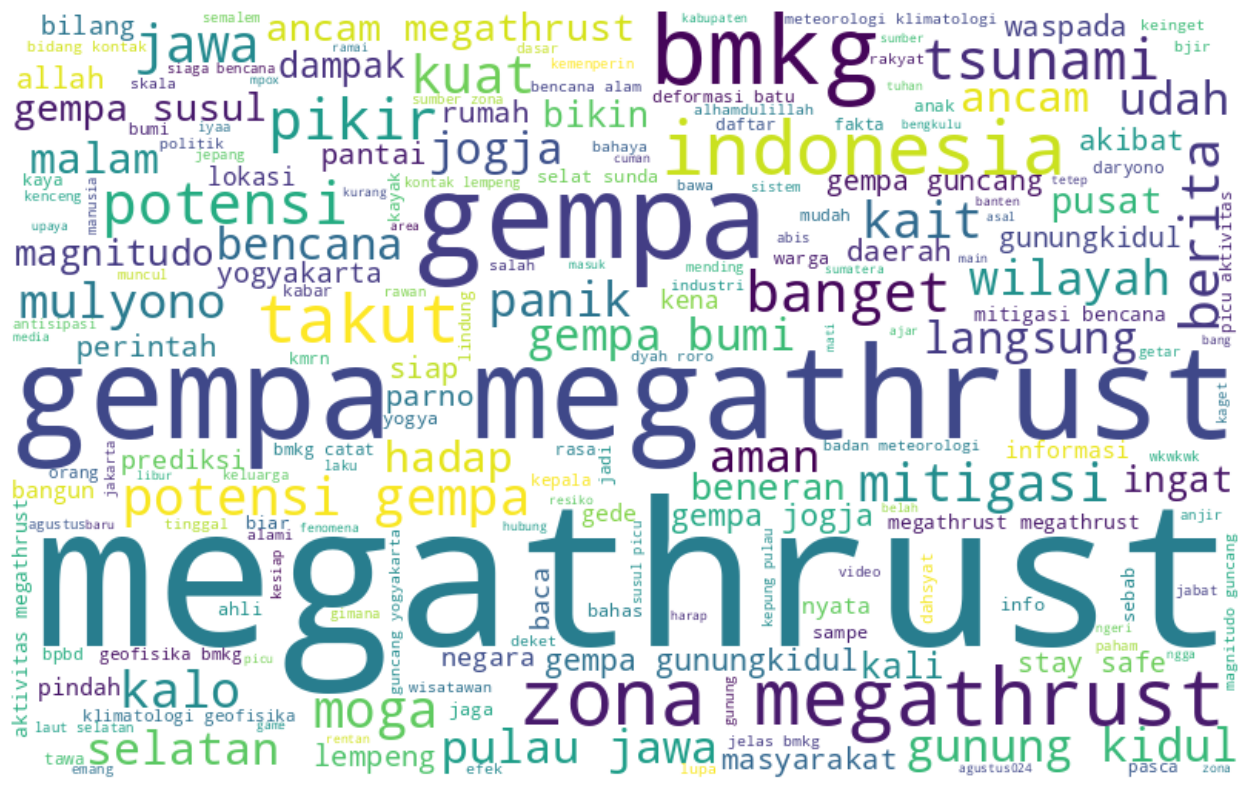

In [133]:
all_words_lem = ' '.join([word for word in df['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [134]:
df['text_string'][1]

'rawan bencana gempa megathrust bpbd tawa damping sekolah media indonesia insider'

In [135]:
df['text_string'][0]

'utek mung kedonyan pdhl siap megathrust sing digowo mung klambi jokowi bien tukang kayu saiki dadi presiden poin nyapo blas raenek insecure2 mergo sesimple ndilat dewe lakon kelas'

In [136]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

pos_text = "Sangat bahagia hari ini"
neg_text = "Dasar anak sialan!! Kurang ajar!!"

result = sentiment_analysis(pos_text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {pos_text} | Label : {status} ({score * 100:.3f}%)')

result = sentiment_analysis(neg_text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {neg_text} | Label : {status} ({score * 100:.3f}%)')


Text: Sangat bahagia hari ini | Label : positive (99.481%)
Text: Dasar anak sialan!! Kurang ajar!! | Label : negative (99.828%)


In [137]:
result = sentiment_analysis(df['text_string'].tolist())

In [138]:
# show the total number of tweets
print(f'Total tweets: {len(result)}')

Total tweets: 548


In [139]:
df['sentiment'] = [label_index[i['label']] for i in result]
df['score'] = [i['score'] for i in result]

In [140]:
tweets_data = df[['text_string', 'sentiment', 'score']]

In [141]:
tweets_data.to_csv('Megatrusht_sentiment.csv', index=False)

In [142]:
tweets_data['sentiment'].value_counts().to_frame().assign(percentage = lambda x: (x / x.sum()) * 100).style.format({'percentage': '{:.2f}%'})


,count,percentage
sentiment,,
neutral,289,52.74%
negative,196,35.77%
positive,63,11.50%


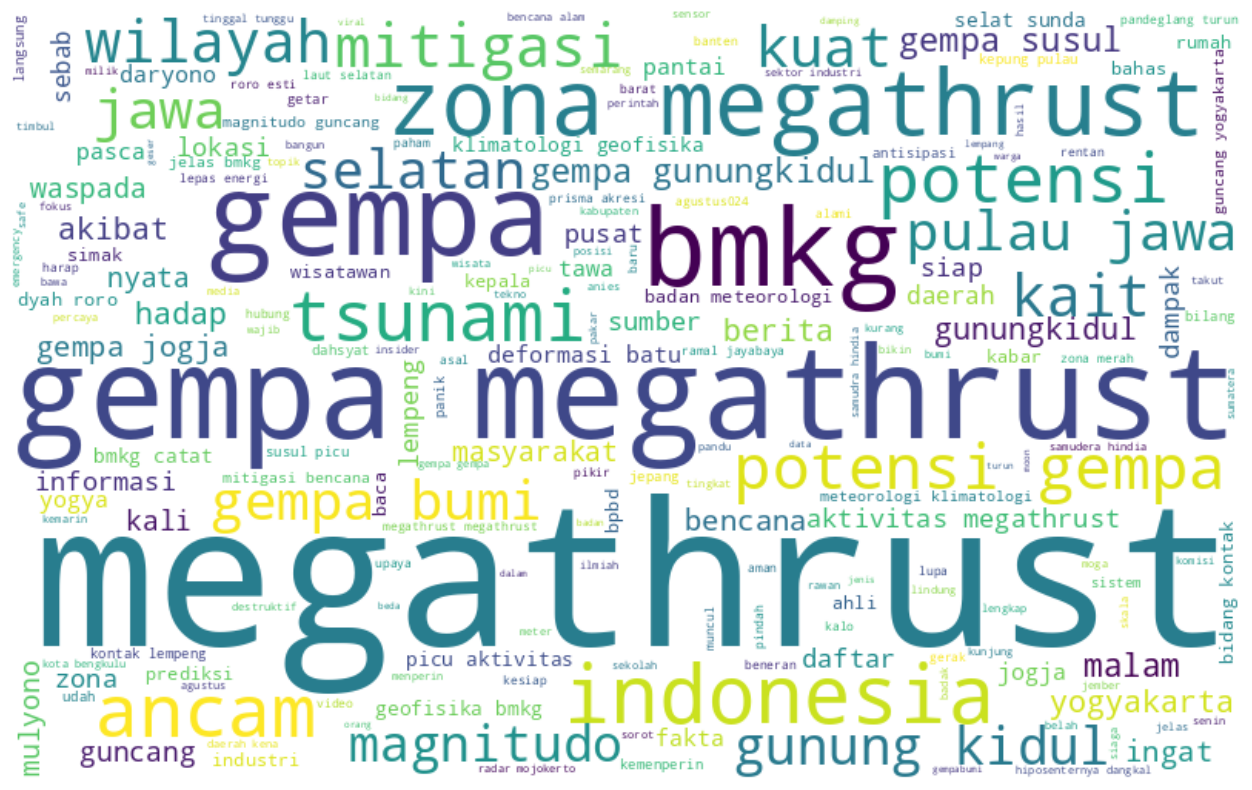

In [151]:
tweets_data_neutral = tweets_data[df['sentiment']=='neutral']
all_words_lem = ' '.join([word for word in tweets_data_neutral['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

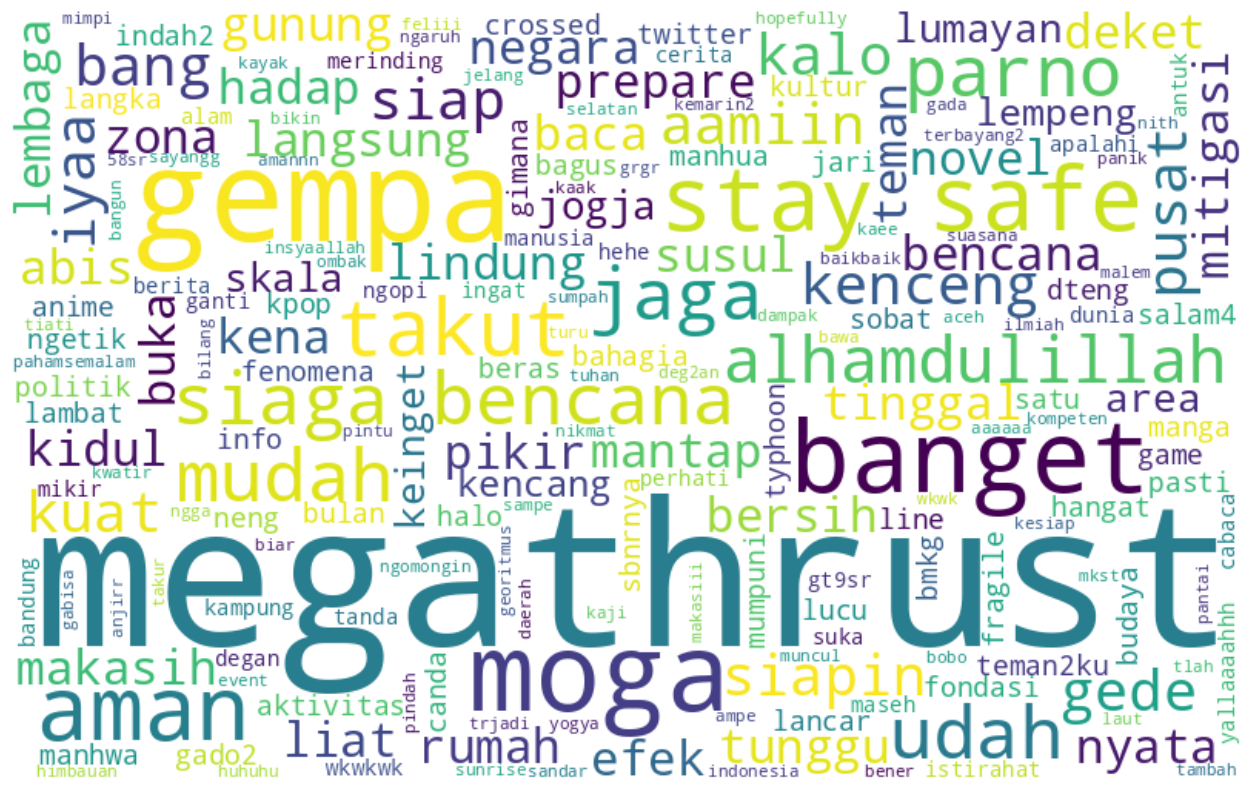

In [152]:
tweets_data_positive = tweets_data[df['sentiment']=='positive']
all_words_lem = ' '.join([word for word in tweets_data_positive['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

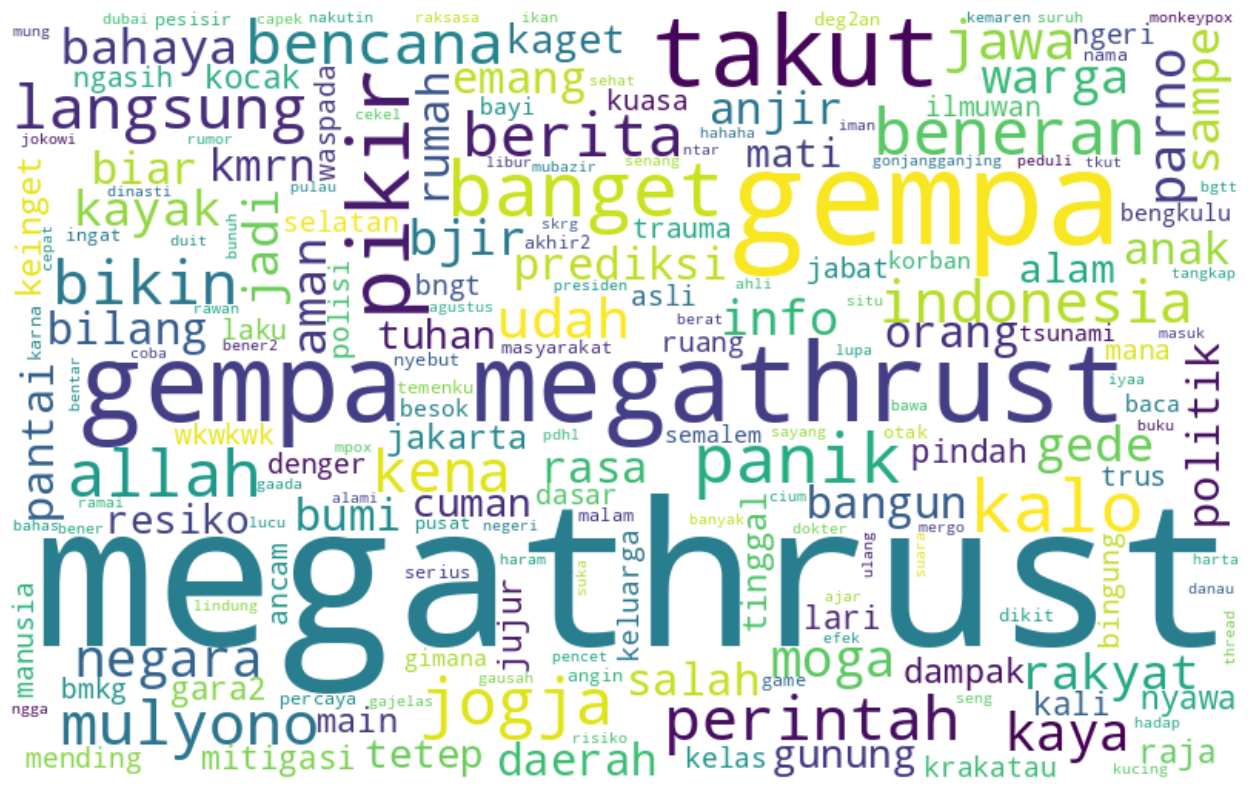

In [153]:
tweets_data_negative = tweets_data[df['sentiment']=='negative']
all_words_lem = ' '.join([word for word in tweets_data_negative['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');